# Students Do: Preventing credit card defaults with neural networks

In this activity, you will train a neural network model to predict whether a credit card holder will default in the next month.

The dataset provided contains `30,000` anonymous records of credit default status with `23` features columns and one binary target column entitled _DEFAULT_, where `1` represents a defaulted credit card.

The `23` features include demographic info (age, gender, marital status, etc.), credit limit, past payment details, and other relevant information.

You are tasked to create a neural network model to predict if a credit card holder will default.

In [1]:
# Initial imports
from path import Path
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

## Instructions

1. Load the data in a Pandas DataFrame.

In [2]:
# Read in data
cc_df = pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\1\03-Stu_CC_Default\Resources\cc_default.csv')

cc_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


2. Define the features set `X` by including all the columns of the DataFrame except the `DEFAULT` column.

In [3]:
# Define features data
X = cc_df.drop("DEFAULT", axis=1)

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


3. Create the target vector `y` by assigning the values of the `DEFAULT` column of the DataFrame.

In [4]:
# Define target data
y = cc_df[["DEFAULT"]]

y.head()

,DEFAULT
0,1
1,1
2,0
3,0
4,0


4. Create the training an testing sets using the `train_test_split` function from `sklearn`.

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

5. Scale the features data using the `StandardScaler` from `sklearn`.

In [6]:
# Create the scaler instance
scaler = StandardScaler()

In [7]:
# Fit the scaler
scaler.fit(X_train)

StandardScaler()

In [8]:
# Scale the features data
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

6. Create a neural network model with `23` inputs, one hidden layer with `69` units, and an output layer with a single output. Use the `relu` activation function for the first layer and `sigmoid` for the second layer.

In [9]:
# Create the sequential model
nn = Sequential()

In [10]:
# Define the model
number_hidden_nodes = 69

number_inputs = 23

nn.add(Dense(units=number_hidden_nodes,
             activation="relu",
             input_dim=number_inputs))

In [11]:
# Output layer
number_clases = 1

nn.add(Dense(units=number_clases,
             activation="sigmoid"))

7. Compile the neural network model using the `binary_crossentropy` loss function, the `adam` optimizer, and `accuracy` as additional metric.

In [12]:
# Compile model
nn.compile(loss="binary_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])

8. Fit the model with `100` epochs.

In [13]:
# Fit the model
model = nn.fit(X_train_scaled,
               y_train,
               epochs=100)

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4742 - accuracy: 0.8052
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.8168
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8178
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8176
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 0.4365 - accuracy: 0.8191
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8190: 0s - loss: 0.4348 - accuracy
Epoch 7/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8192
Epoch 8/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8195
Epoch 9/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4311 - accuracy: 0.8212
Epoch 10/100
704/704 [==============================] - 1s 2m

9. Plot the loss function and accuracy.

In [14]:
# Create a DataFrame with the history dictionary
cc_df = pd.DataFrame(model.history,
                     index=range(1, len(model.history["loss"]) + 1))

cc_df.head()

,loss,accuracy
1,0.474182,0.805244
2,0.449495,0.816756
3,0.443757,0.817822
4,0.439254,0.817600
5,0.436503,0.819067


<AxesSubplot:>

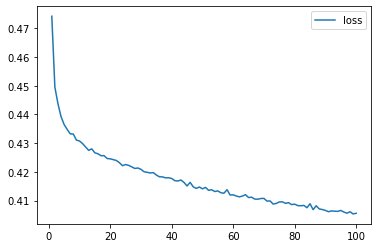

In [15]:
# Plot the loss
cc_df.plot(y="loss")

<AxesSubplot:>

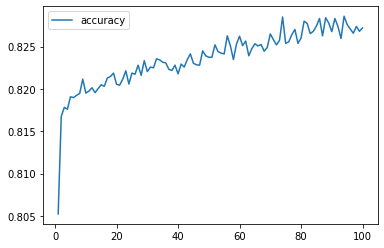

In [16]:
# Plot the accuracy
cc_df.plot(y="accuracy")

10. Evaluate the model using testing data and the `evaluate` method.

In [17]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,
                                         y_test,
                                         verbose=2)

print(f"Loss: {model_loss}\n"
      f"Accuracy: {model_accuracy}")

235/235 - 1s - loss: 0.4454 - accuracy: 0.8148
Loss: 0.44542935490608215
Accuracy: 0.8148000240325928


## Challenge

For this challenge section, you have to figure out how the model you created could be modified to improve the accuracy.

1. Review the Keras documentation about activation functions, and decide if there is anyone that could be used instead of `sigmoid`. https://keras.io/api/layers/activations/

2. Add a second hidden layer with `69` units and use a different activation function than `sigmoid`.

3. Change any other parameter that you believe could improve the model's accuracy.

4. Evaluate the model's accuracy and loss and write down your conclusions.

In [51]:
# Create the sequential model
neuron = Sequential()

In [52]:
# First layer. Define the model
number_hidden_nodes = 69

number_inputs = 23

neuron.add(Dense(units=number_hidden_nodes,
                 activation="relu",
                 input_dim=number_inputs)) 

In [53]:
# Second layer.
number_hidden_nodes = 69

number_inputs = 23

neuron.add(Dense(units=number_hidden_nodes,
                 activation="selu",
                 input_dim=number_inputs)) 

In [54]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, 
                 activation="softmax"))

In [55]:
# Model summary
neuron.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 69)                1656      
_________________________________________________________________
dense_15 (Dense)             (None, 69)                4830      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 70        
Total params: 6,556
Trainable params: 6,556
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile model
neuron.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [57]:
# Fit the model
model2 = neuron.fit(X_train_scaled,
                    y_train,
                    epochs=100)

Epoch 1/100
704/704 [==============================] - 2s 2ms/step - loss: 0.4666 - accuracy: 0.2224
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.2224
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.2224
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.2224: 0s - loss: 0.4314 - accura
Epoch 5/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.2224
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.2224
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.2224
Epoch 8/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.2224
Epoch 9/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.2224
Epoch 10/100
704/704 [==============================] - 1s 2ms/

In [58]:
# Evaluate the model fit with linear dummy data
model2_loss, model2_accuracy = neuron.evaluate(X_test_scaled,
                                               y_test,
                                               verbose=2)

print(f"Loss: {model2_loss} \n"
      f"Accuracy: {model2_accuracy}")

235/235 - 0s - loss: 0.4797 - accuracy: 0.2177
Loss: 0.4796626567840576 
Accuracy: 0.21773333847522736


### Conclusions

My changes led to a huge drop in accuracy and increase in loss of data - so not a good choice! :(